<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/AI_HW3_Classification_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 3. Линейная классификация (base)**

### **Оценивание и штрафы**

С наступающим новым годом, друзья! Магистратура бежит быстро и мы бежим очень быстро, а зима — то время, когда хотелось бы бежать чуть медленнее. Поэтому это домашнее задание мы сделали сильно короче от его начальной версии!

Как всегда, каждая из задач имеет «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

В задании две части:

- Часть 1: написание логистической регрессии своими руками — уверенны, логлосс вы уже знаете как свои пять пальцев.
- Часть 2: решение задачи классификации на текстах.

In [51]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
import time


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['hstack']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [52]:
#from google.colab import drive # Если вы работаете в коллабе
#drive.mount('/content/drive')

# **Часть 1. Логистическая регрессия своими руками (5 баллов)**

Логистическая регрессия — безумно важная и удобная модель для понимания начальных концепций. Вы много практиковались с выведением формулы градиента логлосса, шага спуска, а в прошлом дз сделали SGD. Давайте сделаем ещё шаг вперед — и реализуем логистическую регрессию своими руками.

На практике, часто хватает алгоритмов из коробки. Но иногда очень удобно сделать свой алгоритм.

## **Теоретическая сноска: почему LogLoss'а так много**

Почти наверное (в математике это значит, во всех случаях, кроме множества размером 0) логлосс набил оскомину за несколько заданий. Давайте посмотрим на него ещё раз:

В логистической регрессии функция потерь

$$\text{LogLoss}(y, \hat{p}) = -\left(y\log \hat{p} + (1-y)\log (1-\hat{p})\right)$$

Зачем мы так долго с ней возимся?

#### **Пункт 1.**
Во-первых, это **следствие максимизации правдоподобия** при биномиальной модели.

Если считать, что целевая переменная (Y\in{0,1}) распределена как

$$P(Y=1 \mid x) = \hat{p}(x), \qquad P(Y=0\mid x) = 1-\hat{p}(x),$$
то правдоподобие выборки ( (x_i, y_i) )\ равно
$$L = \prod_{i=1}^n \hat{p}_i^{y_i}(1-\hat{p}_i)^{1-y_i}.$$

Максимизация $\log L$ эквивалентна минимизации LogLoss.
Таким образом, LogLoss — **единственная функция потерь, полностью согласованная с вероятностной моделью логистической регрессии**.

#### **Пункт 2.**

Во-вторых, логлосс поможет нам в будущем понять другие функции потерь. Так, например LogLoss является частным случаем **кросс-энтропии между истинным распределением и предсказанным**.

Для двух распределений $p$ (истинного) и $q$ (предсказанного) кросс-энтропия определяется как

$$H(p,q) = -\sum_{k} p(k)\log q(k).$$

В бинарном случае истинное распределение дискретно:

$$p = (y, 1-y), \qquad q = (\hat{p}, 1-\hat{p}),$$
и подстановка даёт

$$H(p,q) = -\left[y\log \hat{p} + (1-y)\log (1-\hat{p})\right] = \text{LogLoss}.$$


В общем, любим, жалуем и реализуем.




### **Задание 1. Реализуйте класс логистической регрессии, обучаемой с помощью:**

**Задание 1.1 (1.5 балла). Градиентного спуска**

**Задание 1.2 (1.5 балла). Стохастического градиентного спуска**

До этого вы писали код без ограничений. Здесь же необходимо соблюдать следующие условия:

- Градиентный спуск необходимо записать в векторном виде;
- Циклы средствами python допускается использовать только для итераций градиентного спуска;

**Класс градиентного спуска должен:**
- В качестве критерия останова использовать (одновременно):
  - проверку на евклидову норму разности весов на двух соседних итерациях задаваемого параметром `tolerance`;
  - достижение максимального числа итераций, задаваемого параметром `max_iter`.
- Обладать атрибутом `loss_history`. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту). Данный атрибут необходим, чтобы проследить, что оптимизационный процесс действительно сходится;
- Инициализировать веса случайным образом или нулевым вектором (на ваш выбор).

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

**Шаблон класса описан ниже, вам нужно реализовать каждую из заготовленных функций.**

**ВАЖНО!** Мы заполняем данный шаблон, даже если он нам не нравится. Менять структуру класса и писать по-своему запрещено - за это будут сняты баллы.

In [53]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.eta = eta
        self.loss_history = []

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """

        # Ваш код здесь
        ell, d = X.shape

        # инициализация весов
        if self.w0 is None:
            self.w = np.zeros(d)
        else:
            self.w = self.w0.copy()

        for _ in range(self.max_iter):
            w_old = self.w.copy()

            # считаем лосс ДО шага
            self.loss_history.append(self.calc_loss(X, y))

            if self.gd_type == 'full':
                grad = self.calc_gradient(X, y)
                self.w -= self.eta * grad

            elif self.gd_type == 'stochastic':
                i = np.random.randint(ell)
                Xi = X[i:i+1]
                yi = y[i:i+1]
                grad = self.calc_gradient(Xi, yi)
                self.w -= self.eta * grad

            else:
                raise ValueError("gd_type must be 'full' or 'stochastic'")

            # критерий остановки
            if np.linalg.norm(self.w - w_old) < self.tolerance:
                break

        return self

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x)) # Ваш код здесь

    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        # Ваш код здесь
        return self.sigmoid(X @ self.w)


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
          # Ваш код здесь
        return (self.predict_proba(X) >= 0.5).astype(int)

        


    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        # В качестве лосса тут рассматриваем LogLoss !

        # Ваш код здесь
        ell = X.shape[0]
        p = self.sigmoid(X @ self.w)
        grad = X.T @ (p - y) / ell
        return grad


    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        p = self.sigmoid(X @ self.w)
        
        eps = 1e-15
        p = np.clip(p, eps, 1 - eps)

        loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
        return loss


Теперь проверим работу вашего класса на синтетических данных.

In [54]:
from sklearn.preprocessing import StandardScaler

X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=2,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Задание 2 (0.6 балла)**

Теперь давайте тестировать модель.
1. Обучите свою логистическую регрессию на синтетических данных (0.2 балла) — на полном GD и SGD;
2. Cравните результат с моделью из библиотеки. Посчитайте roc-auc, accuracy, постройте ROC и PR кривые. , оцените разницу в производительности моделей по метрикам качества. Ответьте на вопросы:
- Какая показывает лучший результат? Почему?
- Есть ли что-то в модели из коробки, что по умолчанию делает её не равной вашей модели? Для ответа на этот вопрос вам может пригодитться [документация](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Её мы изучаем всегда, чтобы понимать тонкости реализации какого-либо метода в библиотеке. (0.4 балла)

In [55]:
lr_sgd = LogReg(gd_type='stochastic')
lr_sgd.fit(X_train, y_train)

lr_full = LogReg(gd_type='full')
lr_full.fit(X_train, y_train)


LogReg(gd_type='full')

In [56]:
# Ваш код здесь
lr_sklearn = LogisticRegression(
    penalty='l2', #по документации это дефолтные параметры, именно поэтому лог регрессия из коробки будет уже лучше, ведь есть л2-регулизация (штрафы больших весов) и оптимизатор solver
    solver='lbfgs',
    max_iter=100
)

lr_sklearn.fit(X_train, y_train)

LogisticRegression()

In [57]:
models = {
    'SGD': lr_sgd,
    'Full GD': lr_full,
    'Sklearn': lr_sklearn
}

for name, model in models.items():
    if name == 'Sklearn':
        proba = model.predict_proba(X_test)[:, 1]
        pred = model.predict(X_test)
    else:
        proba = model.predict_proba(X_test)
        pred = model.predict(X_test)

    print(f'{name}:')
    print('  ROC-AUC:', roc_auc_score(y_test, proba))
    print('  Accuracy:', accuracy_score(y_test, pred))

SGD:
  ROC-AUC: 0.9362369162104353
  Accuracy: 0.861
Full GD:
  ROC-AUC: 0.9388495151936846
  Accuracy: 0.8660333333333333
Sklearn:
  ROC-AUC: 0.9398924765443586
  Accuracy: 0.8681


Можно отметить, что лог регрессия из коробки показывает лучше результаты, хотя ручные модели также хорошо себя показали. Как я уже писала выше, это все связано с тем, что в методе из коробки мы можем сами настроить различные параметры (даже есть дефолтные, которые уже лучше обычного лог реса), тем самым повышая необходимые метрики

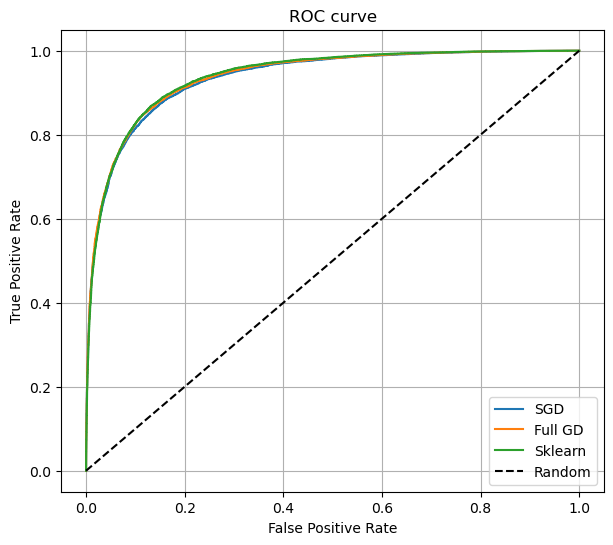

In [58]:
plt.figure(figsize=(7, 6))

for name, model in models.items():
    if 'Sklearn' in name:
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = model.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid(True)
plt.show()


по графику едва заметна разница в качестве

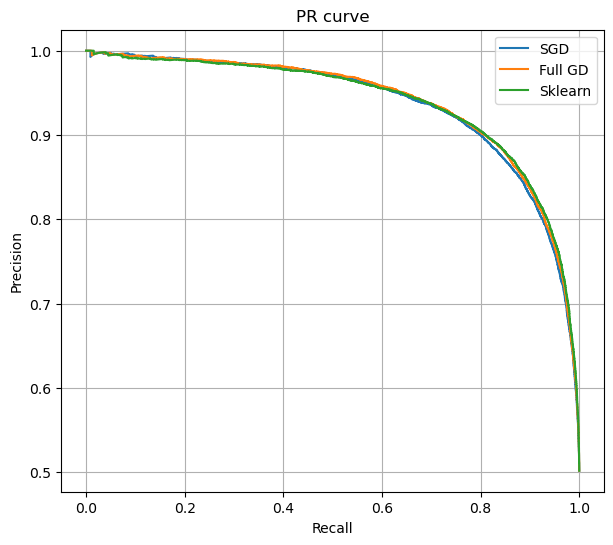

In [59]:
plt.figure(figsize=(7, 6))

for name, model in models.items():
    if 'Sklearn' in name:
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = model.predict_proba(X_test)

    precision, recall, _ = precision_recall_curve(y_test, proba)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend()
plt.grid(True)
plt.show()


тут также видно, что линии разных моделей почти что наслоены друг на друга 


### **Задание 3 (0.4 балла)**

Для трех полученных моделей, визуализируйте прогнозы по данным на тестовой выборке. Для этого:
- получите прогнозы;
- сомжите данные, используя PCA. Не забудьте, что PCA полагает нулевое среднее и единичную дисперсию;
- покрасьте данные по прогнозам.

Как различаются графики для трёх моделей? И различаются ли?

Не забыла про нулевое среднее и единичную дисперсию у PCA, нужно сделать стандартизацию! 

In [60]:
sc = StandardScaler()
X_test_scaled = sc.fit_transform(X_test)

In [61]:
pca = PCA(n_components=2) #параметр отвечает за D визуализацию, у нас будет 2D
X_test_pca = pca.fit_transform(X_test_scaled)

In [62]:
#прогнозы для трех моделей
pred_sgd = lr_sgd.predict(X_test)
pred_full = lr_full.predict(X_test)
pred_sklearn = lr_sklearn.predict(X_test)

In [63]:
models_preds = [
    ('SGD', pred_sgd),
    ('Full GD', pred_full),
    ('Sklearn', pred_sklearn)
]

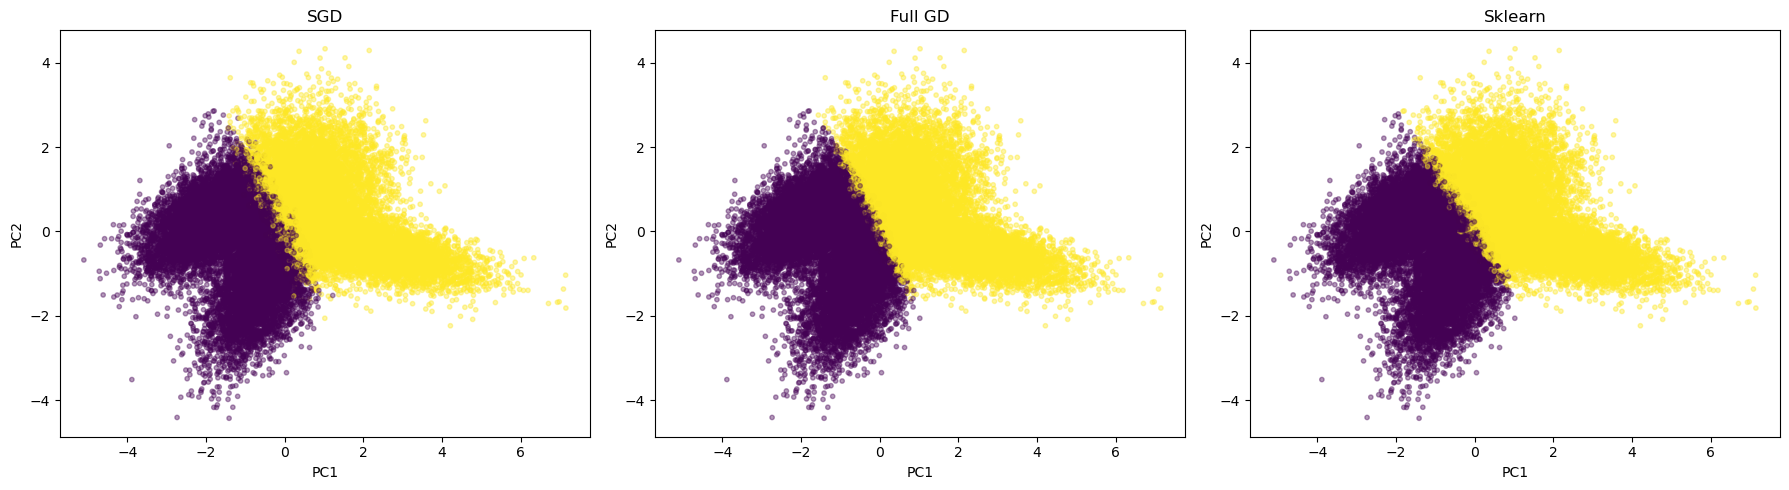

In [64]:
plt.figure(figsize=(18, 5))

for i, (name, pred) in enumerate(models_preds, 1):
    plt.subplot(1, 3, i)
    plt.scatter(
        X_test_pca[:, 0],
        X_test_pca[:, 1],
        c=pred,
        alpha=0.4,
        s=10
    )
    plt.title(name)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.tight_layout()
plt.show()


Можно отметить, что взиуализации очень похожи для трех моделей, красивая бабочка получилась! Основные кластеры совпадают, только в центре (в зоне пересечения классов) можно отметить, что у SGD больше перемешано все из-за стохатичности обучения

# **Часть 2. Обучение моделей на текстовых данных. (5 баллов)**

 ### **Подготовка данных из реального мира.**

Ещё одна прелесть простых моделей — возможность решать с ними неструктурированные (изначально не табличные) задачи. Давайте посмотрим на это в действии на примере текстов.


Загрузите данные с конкурса  [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv) (вам нужна только обучающая выборка, файл `train.csv`). Задача состоит в определении постов, сообщающих о чрезвычайной ситуации. В рамках домашнего задания, этот набор данных будет отличным полем для тренировки в обработке признаков.

In [65]:
from sklearn.model_selection import train_test_split

PATH = 'train.csv'
data = pd.read_csv(PATH)

data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### **Задание 10. Базовая предобработка (1.5 балла).**

- Выведите на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой (0.2 балла).

In [66]:
# Ваш код здесь
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Видим, что у двух столбцов есть пропущенные значения, заменим их пустой строкой 

In [67]:
data = data.fillna('')

In [68]:
data.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

Теперь нет пропусков!

- Проанализируйте количество уникальных значений в столбцах, опустив `text`. Сделайте выводы. (0.5 балла)

In [69]:
# Ваш код здесь, не забудьте выводы
cols_to_check = [col for col in data.columns if col != 'text']

for col in cols_to_check:
    n_unique = data[col].nunique()
    print(f'Столбец "{col}" содержит {n_unique} уникальных значений.')

Столбец "id" содержит 7613 уникальных значений.
Столбец "keyword" содержит 222 уникальных значений.
Столбец "location" содержит 3342 уникальных значений.
Столбец "target" содержит 2 уникальных значений.


видим, что у нас задача бинарной классификации, таргет принимает только два значения. В нашем случае количество уникальных айди показывает количество строк в датасете (айди не повторяются) - 7613 строк. Ключевых слов и локаций у нас много

- Проанализируйте соотношение классов в целевой переменной. Какое оно? Выберите метрику, с помощью которой будете оценивать модель.  (0.5 балла)

In [70]:
# Ваш код здесь
# по количеству
class_counts = data['target'].value_counts()
print(class_counts)

# по процентам
class_ratio = data['target'].value_counts(normalize=True)
print(class_ratio)

target
0    4342
1    3271
Name: count, dtype: int64
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


Можно отметить, что нулевого класса больше, соотношение не 50 на 50, но при этом дисбаланс не силько критичный. Но все равно лучше взять метрику ROC-AUC, так как она более чувствительна к перекосу классов, если сравнивать, например, с accuracy

- Объедините все три текстовых столбца в один для baseline (вам поможет конкатенация строк) (0.3 балла)

In [71]:
# Ваш код здесь
data['all_text'] = data['text'] + ' ' + data['keyword'] + ' ' + data['location']
data[['text', 'keyword', 'location', 'all_text']].head()

,text,keyword,location,all_text
0,Our Deeds are the Reason of this #earthquake M...,,,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada,,,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...,,,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",,,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,,,Just got sent this photo from Ruby #Alaska as ...


- Наконец, поделите данные на тренировочную и тестовую выборки. (0.2 балла)

In [72]:
X = data['all_text']  
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Задание 11. Базовые модели. (1 балл).**

Данные, собираемые с сайтов, часто содержат мусор не информативный для моделей. Посмотрите, какого качества и насколько разнообразны данные здесь. Для этого:
- Примените CountVectorizer из sklearn к сырым даным. Какого размера получилась матрица? (0.3 балла)

In [73]:
# Ваш код здесь
vectorizer = CountVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

print("Размер X_train:", X_train_vect.shape)
print("Размер X_test:", X_test_vect.shape)

Размер X_train: (5329, 18455)
Размер X_test: (2284, 18455)


Видим, что у нас высокая размерность: 18455 признаков с учетом 5329 обхектов (треин) - у нас сильно разреженная матрица, лог регрессия справится с такими данными!

- Обучите логистическую регрессию на полученном наборе. Модель возьмите из библиотеки. Какое качество по выбранной вами метрике у модели получилось на тестовых данных? (0.3 балла)

In [74]:
# Ваш код здесь
lr_sklearn.fit(X_train_vect, y_train)

y_proba = lr_sklearn.predict_proba(X_test_vect)[:, 1]
y_pred = lr_sklearn.predict(X_test_vect)

In [75]:
# Ваш код здесь
roc_auc = roc_auc_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)

print("LogReg1 ROC-AUC на тесте:", round(roc_auc, 4)) # основная метрика
print("LogReg1 Accuracy на тесте:", round(accuracy, 4)) # чисто поглядеть

LogReg1 ROC-AUC на тесте: 0.8531
LogReg1 Accuracy на тесте: 0.7995


- ROC-AUC показывает, что модель хорошо различает классы - эта метрика тут лучше подходит, учитывая небольшой дисбаланс классов 
- Accuracy показывает, что около 80% твитов предсказывается верно, что является средним показателем

- Обучите SVC на тех же данных с гиперпараметрами по умолчанию. Измерьте качество на тестовых данных и опишите результат. Проанализируйте качество и скорость обучения.(0.4 балла)

In [76]:
# Ваш код здесь
svc = SVC(probability=True, random_state=42) #probability стоит не дефолтная, чтобы не ломался подсчет roc-auc

start_time = time.time()
svc.fit(X_train_vect, y_train)
train_time = time.time() - start_time

print(f"Время обучения SVC: {train_time:.2f} секунд")

Время обучения SVC: 19.85 секунд


In [77]:
y_proba_svc = svc.predict_proba(X_test_vect)[:, 1]
y_pred_svc = svc.predict(X_test_vect)

roc_auc_svc = roc_auc_score(y_test, y_proba_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("SVC1 ROC-AUC на тесте:", round(roc_auc_svc, 4))
print("SVC1 Accuracy на тесте:", round(accuracy_svc, 4))

SVC1 ROC-AUC на тесте: 0.8557
SVC1 Accuracy на тесте: 0.8047


Можно отметить, что ROC-AUC и accuracy стал немножко выше, чем у лог рега, но все равно не сильно отличаются. Скорость обучения в целом дольше чем у лог рега, но все равно не сильно уж и долго. Хотя может быть это связано с тем, что пока что у меня мало данных и на большем количестве будет в разы дольше происходить обучение. Думаю, когда много данных, то быстрее будет использовать лин модели, как видно, качество не сильно различается, но скорость в разы

### **Задание 12. Улучшение базовых моделей за счет данных. (0.3 балла).**

- Подберите гиперпараметры CountVectorizer так, чтобы признаков было минимум в 4 раза меньше, чем объектов, а качество модели при этом изменилось не более чем на $\pm 0.07$. Опишите подобранные гиперпараметры и на что они влияют.

Обучайте и логистическую регрессию, и SVC.

In [78]:
# Ваш код здесь
vectorizer_reduced = CountVectorizer(
    max_features=1300,
    stop_words='english',
    min_df=2,   # убираем редкие слова
    max_df=0.95 # убираем слишком частые
)

X_train_vect_red = vectorizer_reduced.fit_transform(X_train)
X_test_vect_red = vectorizer_reduced.transform(X_test)

print("Размер X_train:", X_train_vect_red.shape)
print("Размер X_test:", X_test_vect_red.shape)

Размер X_train: (5329, 1300)
Размер X_test: (2284, 1300)


Тут для сокращения числа признаков я убрала стоп-слова (всякие служебные, не несущие смысла), убираем редкие слова, а также слишком частые, да и самостоятельно сокращаем число признаков параметром max_features 

In [79]:
# Ваш код здесь
lr_sklearn.fit(X_train_vect_red, y_train)

y_proba_lr = lr_sklearn.predict_proba(X_test_vect_red)[:, 1]
y_pred_lr = lr_sklearn.predict(X_test_vect_red)

roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("LogReg2 ROC-AUC на тесте:", round(roc_auc_lr, 4)) 
print("LogReg2 Accuracy на тесте:", round(accuracy_lr, 4))

LogReg2 ROC-AUC на тесте: 0.841
LogReg2 Accuracy на тесте: 0.7785


Было: 
- LogReg1 ROC-AUC на тесте: 0.8531
- LogReg1 Accuracy на тесте: 0.7995

Метрики снизились меньше чем на 0.07 

In [80]:
svc.fit(X_train_vect_red, y_train)
y_proba_svc = svc.predict_proba(X_test_vect_red)[:, 1]
y_pred_svc = svc.predict(X_test_vect_red)

roc_auc_svc = roc_auc_score(y_test, y_proba_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("SVC2 ROC-AUC на тесте:", round(roc_auc_svc, 4))
print("SVC2 Accuracy на тесте:", round(accuracy_svc, 4))

SVC2 ROC-AUC на тесте: 0.8433
SVC2 Accuracy на тесте: 0.7842


Было: 
- SVC1 ROC-AUC на тесте: 0.8557
- SVC1 Accuracy на тесте: 0.8047

Тоже меньше чем на 0.07 изменились метрики, так что тоже метрики изменились в нужном диапазоне 

### **Задание 13. Улучшение базовых моделей за счет данных 2. (0.7 балла).**

В первом пункте мы склеили все строки в одну. Но можно было бы поступить иначе — и получить категории из `'keyword', 'location'`. Протестируйте такой подход на обеих моделях и замерьте качество. Улучшает ли это результат?

Можно попробовать обработать keyword и location через OHE

In [81]:
# Ваш код здесь
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# OHE для keyword
ohe_keyword = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_keyword_train = ohe_keyword.fit_transform(data.loc[X_train.index, ['keyword']])
X_keyword_test = ohe_keyword.transform(data.loc[X_test.index, ['keyword']])

# OHE для location
ohe_location = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_location_train = ohe_location.fit_transform(data.loc[X_train.index, ['location']])
X_location_test = ohe_location.transform(data.loc[X_test.index, ['location']])

vectorizer = CountVectorizer(max_features=1300,
    stop_words='english',
    min_df=2,  
    max_df=0.95)
X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)

X_train_final = hstack([X_text_train, X_keyword_train, X_location_train])
X_test_final = hstack([X_text_test, X_keyword_test, X_location_test])

print("Размер X_train_final:", X_train_final.shape)
print("Размер X_test_final:", X_test_final.shape)

Размер X_train_final: (5329, 3993)
Размер X_test_final: (2284, 3993)


In [82]:
lr_sklearn.fit(X_train_final, y_train)

y_proba_lr = lr_sklearn.predict_proba(X_test_final)[:, 1]
y_pred_lr = lr_sklearn.predict(X_test_final)

roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("LogReg + OHE ROC-AUC на тесте:", round(roc_auc_lr, 4)) 
print("LogReg + OHE Accuracy на тесте:", round(accuracy_lr, 4))

LogReg + OHE ROC-AUC на тесте: 0.8405
LogReg + OHE Accuracy на тесте: 0.7815


Было: 
- LogReg1 ROC-AUC на тесте: 0.8531
- LogReg1 Accuracy на тесте: 0.7995
- LogReg2 ROC-AUC на тесте: 0.841
- LogReg2 Accuracy на тесте: 0.7785

Видно, что ROC_AUC стал еще меньше, а accuracy между метрик двух моделей, будто бы OHE не так уж и сильно помог

In [83]:
svc.fit(X_train_final, y_train)

y_proba_svc = svc.predict_proba(X_test_final)[:, 1]
y_pred_svc = svc.predict(X_test_final)

roc_auc_svc = roc_auc_score(y_test, y_proba_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("SVC + OHE ROC-AUC на тесте:", round(roc_auc_svc, 4))
print("SVC + OHE Accuracy на тесте:", round(accuracy_svc, 4))

SVC + OHE ROC-AUC на тесте: 0.842
SVC + OHE Accuracy на тесте: 0.7842


Было: 
- SVC1 ROC-AUC на тесте: 0.8557
- SVC1 Accuracy на тесте: 0.8047
- SVC2 ROC-AUC на тесте: 0.8433
- SVC2 Accuracy на тесте: 0.7842

Видно, что ROC_AUC тут также уменьшился несильно, accuracy такой же как у второй модели, когда мы сокращали количество признаков

В общем OHE в данной ситуации не улучшило метрики 

### **Задание 13. Улучшение базовых моделей путем подбора гиперпараметров. (1 балл).**
- Попробуйте подбирать разные гиперпараметры для логистической регрессии. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [84]:
# Ваш код здесь
# делаю перебор гиперпараметров через кросс валидацию, 5 фолдов
from sklearn.model_selection import GridSearchCV

#разные penalty доджны сочетаться с разными solver, поэтому несколько переборов: тут у нас разные регулизации (l1, l2), 
#разные силы регулизации: чем больше, тем слабее регулизация (C), 
# solver отвечает за оптимизацию: liblinear - идеально для бинарной классификациии с маленьким датасетом, lbfgs ко мнгим классам проблем (судя по документации),
#  saga подходит для больших датасетов. Большое количество итераций сделано, чтобы solverы могли раскрыться, метрика взяла roc_auc 
param_grid = [
    {
        'solver': ['lbfgs'],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 5, 10]
    },
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 5]
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1]
    }
]

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=3000),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train_vect, y_train) #взяла первое разбиение, там были лучшие результаты
print("Лучшие параметры:", grid_lr.best_params_)
print("Лучший ROC-AUC (CV):", grid_lr.best_score_)

Лучшие параметры: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Лучший ROC-AUC (CV): 0.8475376516796824


In [85]:
best_lr = grid_lr.best_estimator_

y_proba = best_lr.predict_proba(X_test_vect)[:, 1]
y_pred = best_lr.predict(X_test_vect)

print("LR_best ROC-AUC на тесте:", roc_auc_score(y_test, y_proba))
print("LR_best Accuracy на тесте:", accuracy_score(y_test, y_pred))

LR_best ROC-AUC на тесте: 0.8530185644225362
LR_best Accuracy на тесте: 0.8064798598949212


Получается, дефолтная лог регрессия показывает самый лучший результат на этих данных + выросло accuracy, roc-auc остался как у первой лог регрессии

- Попробуйте подбирать разные гиперпараметры для модели SVC. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [86]:
# Ваш код здесь
#тут тоже перебор через кросс валидацию с 5 фолдами. Пробуем разные kernel (тип ядра): linear (прямая линия), rbf (нелинейная граница, дольше),
# для rbf у нас также есть параметр gamma (отвечает за сложность границы, если большая, то модель будет подстраиваться под данные - переобучаться),
# также есть сила регулизации C (чем больше, тем слабее регулизация)
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 5, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 5],
        'gamma': ['scale', 0.01, 0.1]
    }
]

grid_svc = GridSearchCV(
    SVC(probability=True),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_svc.fit(X_train_vect, y_train)

print("Лучшие параметры:", grid_svc.best_params_)
print("Лучший ROC-AUC (CV):", grid_svc.best_score_)

Лучшие параметры: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Лучший ROC-AUC (CV): 0.8482180359782123


In [87]:
best_svc = grid_svc.best_estimator_

y_proba = best_svc.predict_proba(X_test_vect)[:, 1]
y_pred = best_svc.predict(X_test_vect)

print("SVC_best ROC-AUC на тесте:", roc_auc_score(y_test, y_proba))
print("SVC_best Accuracy на тесте:", accuracy_score(y_test, y_pred))

SVC_best ROC-AUC на тесте: 0.8557027713110711
SVC_best Accuracy на тесте: 0.8047285464098074


При переборе гиперпараметров также получилась дефолтная модель, тут она тоже лучше. Но SVC конечно сильно долльше лог рега работает

Ваши выводы здесь. (они в коде и после кода в маркдауне)

### **Задание 14. (0.5 балла)**

Оформите два [пайплайна](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html):
- для модели регрессии
- для SVC модели

в пайплайн должны входить предобработка сырого датасета и обучение модели.

In [88]:
# Ваш код здесь
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

def to_series(X):
    return pd.Series(X.ravel())

preprocessor = ColumnTransformer([
    ('text', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='')),
        ('to_series', FunctionTransformer(to_series)),
        ('vectorizer', CountVectorizer(max_features=1300, stop_words='english'))
    ]), ['text']),
    
    ('keyword', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), ['keyword']),
    
    ('location', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), ['location'])
])

pipe_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=3000,
        C = 0.1
    ))
])
pipe_svc = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', SVC(
        kernel='rbf',
        C=1,
        gamma='scale',
        probability=True
    ))
])

In [89]:
X = data[['text', 'keyword', 'location']]
y = data['target']
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [90]:
pipe_lr.fit(X_train_df, y_train)
pipe_svc.fit(X_train_df, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('to_series',
                                                                   FunctionTransformer(func=<function to_series at 0x317f353a0>)),
                                                                  ('vectorizer',
                                                                   CountVectorizer(max_features=1300,
                                                                                   stop_words='english'))]),
                                                  ['text']),
                                                 ('keyword',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['keyword']),
                                                 ('location',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location'])])),
                ('classifier', SVC(C=1, probability=True))])

In [91]:
# LogReg
y_proba_lr = pipe_lr.predict_proba(X_test_df)[:, 1]
y_pred_lr = pipe_lr.predict(X_test_df)

print("LogReg Pipe ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("LogReg Pipe Accuracy:", accuracy_score(y_test, y_pred_lr))

# SVC
y_proba_svc = pipe_svc.predict_proba(X_test_df)[:, 1]
y_pred_svc = pipe_svc.predict(X_test_df)

print("SVC Pipe ROC-AUC:", roc_auc_score(y_test, y_proba_svc))
print("SVC Pipe Accuracy:", accuracy_score(y_test, y_pred_svc))

LogReg Pipe ROC-AUC: 0.8527169593178698
LogReg Pipe Accuracy: 0.7964098073555166
SVC Pipe ROC-AUC: 0.8547842109727708
SVC Pipe Accuracy: 0.7972854640980735


Видим лучшие показатели! Все супер! 

**Опишите общие мысли о работе. Это место для вашей рефлексии, не обязательное, но полезное.**  🐤

Нравится работать с текстовыми данными, интересно пробовать новое,улучшать модели. Пайплайн было очень сложно построить, долго пыталась, чтобы вообще заработало, но зато теперь с сырых данных у нас все предобрабатывается и строятся предсказания